# 📘 Análise Exploratória de Dados: Previsão de Churn Bancário

# Etapa 1: Imports e Configurações

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# Configurações gerais

In [2]:
sns.set(style="whitegrid")

# Etapa 2: Leitura dos dados

In [3]:
path = "data/BankChurners.csv"  # ou o caminho real
raw_df = pd.read_csv(r"C:\Users\Iago\OneDrive\Desktop\Projeto Churn\Bank-Churn-Prediction-montes_claros\data\BankChurners.csv")
df = raw_df.copy()

# Etapa 3: Limpeza e ajustes iniciais
# Remove colunas irrelevantes para análise

In [4]:
if "CLIENTNUM" in df.columns:
    df.drop(columns=["CLIENTNUM"], inplace=True)

# Etapa 4: Criação de variáveis derivadas 

In [5]:
df["Ticket_Medio"] = df["Total_Trans_Amt"] / df["Total_Trans_Ct"]
df["Transacoes_por_Mes"] = df["Total_Trans_Ct"] / df["Months_on_book"]
df["Gasto_Medio_Mensal"] = df["Total_Trans_Amt"] / df["Months_on_book"]
df["Rotativo_Ratio"] = df["Total_Revolving_Bal"] / df["Credit_Limit"]
df["Disponibilidade_Relativa"] = df["Avg_Open_To_Buy"] / df["Credit_Limit"]
df["Caiu_Transacoes"] = df["Total_Ct_Chng_Q4_Q1"] < 1
df["Caiu_Valor"] = df["Total_Amt_Chng_Q4_Q1"] < 1
df["Score_Relacionamento"] = df["Total_Relationship_Count"] * df["Months_on_book"]
df["LTV_Proxy"] = df["Credit_Limit"] * df["Months_on_book"]
df["Faixa_Idade"] = pd.cut(df["Customer_Age"], bins=[25, 35, 45, 55, 65, 75], labels=["25-35","36-45","46-55","56-65","66-75"])
df["Renda_Class"] = df["Income_Category"].replace({
    "Less than $40K": "Baixa", "$40K - $60K": "Média-Baixa",
    "$60K - $80K": "Média", "$80K - $120K": "Alta", "$120K +": "Muito Alta",
    "Unknown": "Desconhecida"
})

# Etapa 5: Verificação de Balanceamento das Classes

Attrition_Flag
Existing Customer    83.934038
Attrited Customer    16.065962
Name: proportion, dtype: float64


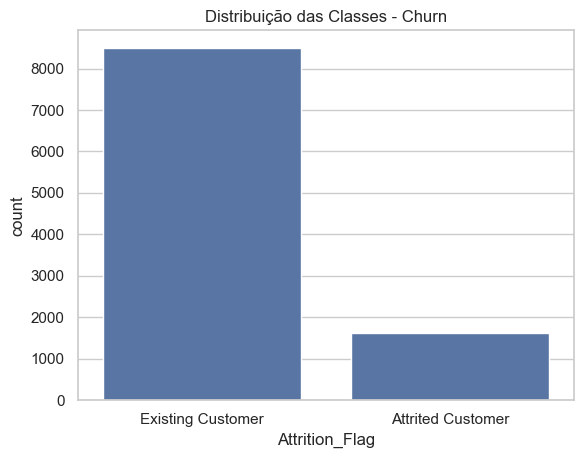

In [6]:
print(df["Attrition_Flag"].value_counts(normalize=True) * 100)
sns.countplot(data=df, x="Attrition_Flag")
plt.title("Distribuição das Classes - Churn")
plt.show()

# Etapa 6: Distribuição das variáveis numéricas

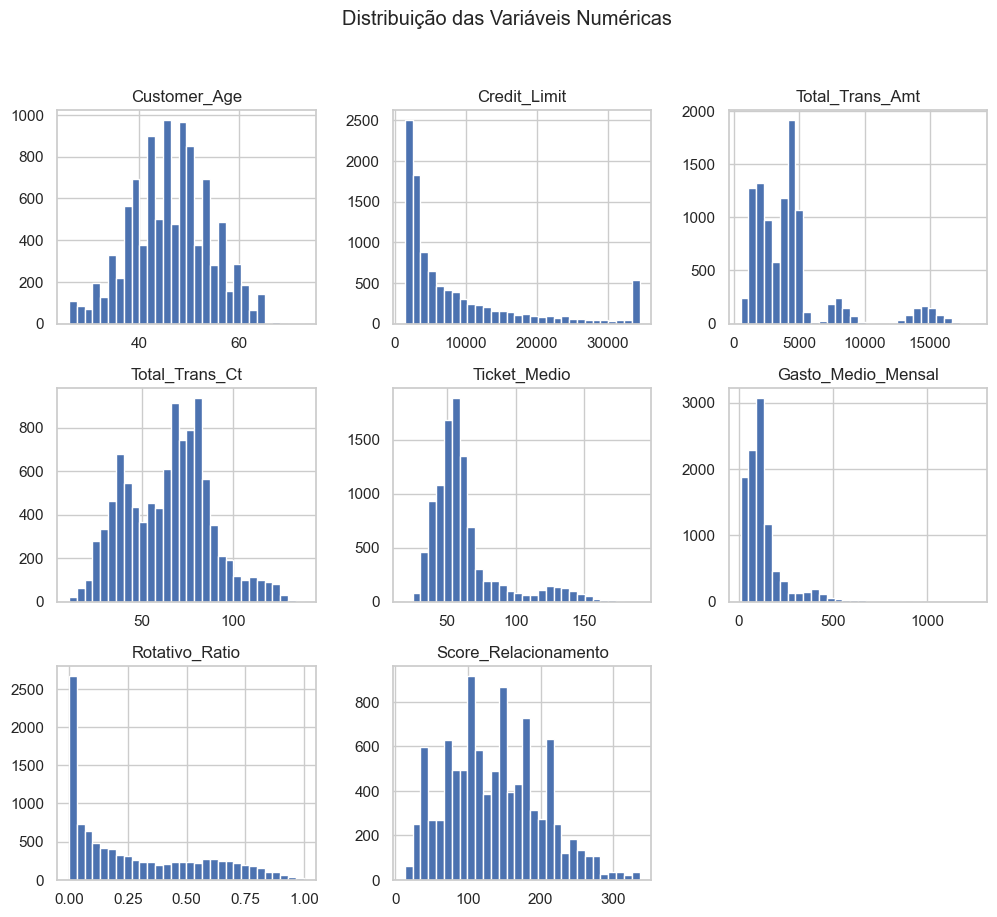

In [7]:
numeric_features = ["Customer_Age", "Credit_Limit", "Total_Trans_Amt", "Total_Trans_Ct",
                    "Ticket_Medio", "Gasto_Medio_Mensal", "Rotativo_Ratio", "Score_Relacionamento"]
df[numeric_features].hist(bins=30, figsize=(12,10))
plt.suptitle("Distribuição das Variáveis Numéricas")
plt.show()


# Etapa 7: Correlações

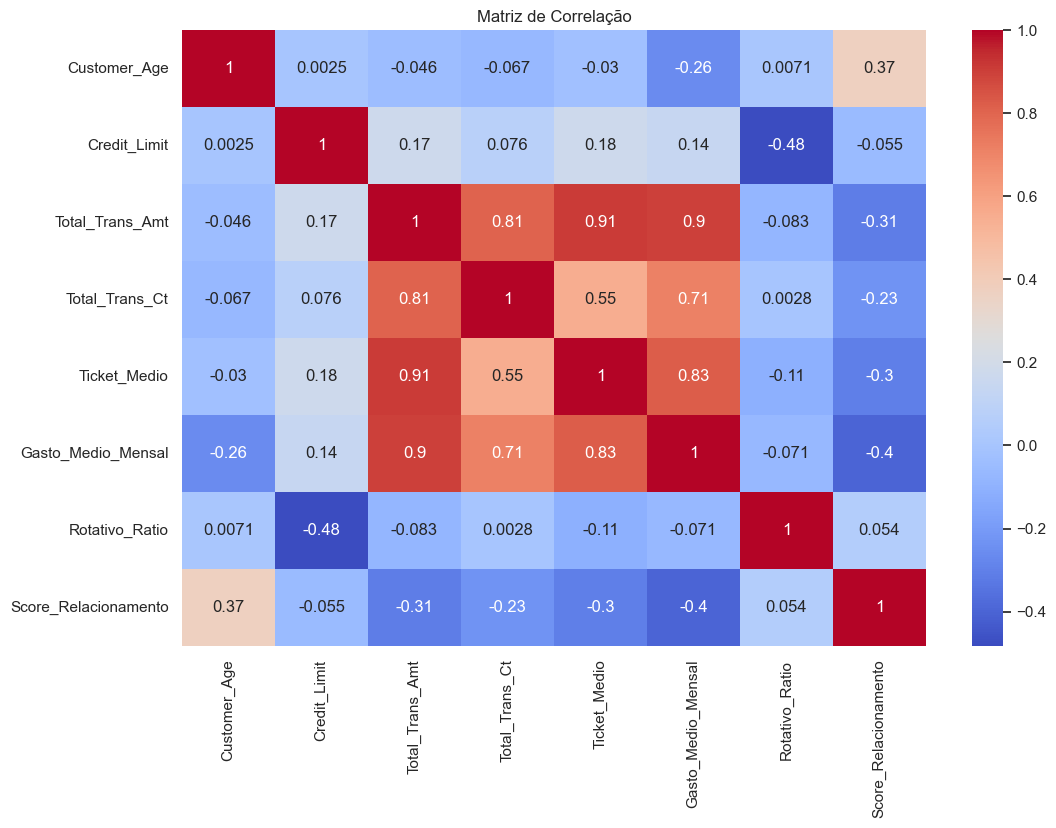

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

# Etapa 8: PCA + Clusterização

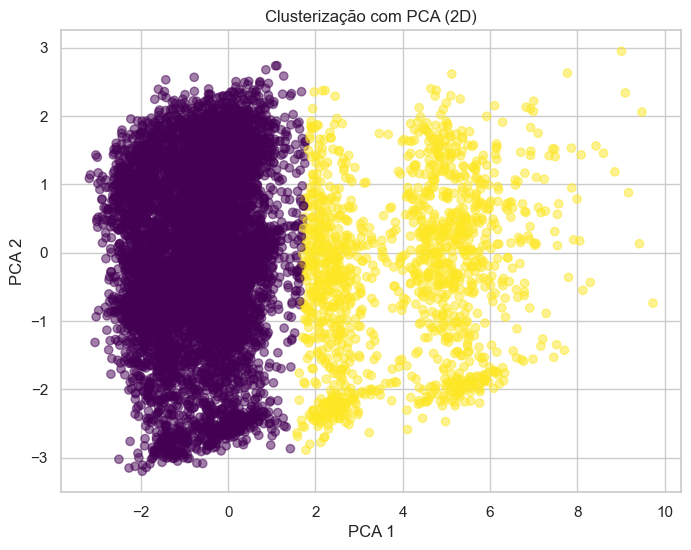

In [9]:
X_pca = df[numeric_features].fillna(0)
X_scaled = (X_pca - X_pca.mean()) / X_pca.std()
pca = PCA(n_components=2)
pca_comp = pca.fit_transform(X_scaled)
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(pca_comp)

plt.figure(figsize=(8,6))
plt.scatter(pca_comp[:,0], pca_comp[:,1], c=labels, cmap="viridis", alpha=0.5)
plt.title("Clusterização com PCA (2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# Etapa 9: Conclusão Preliminar

In [10]:
print("""
Resumo:
- Classes estão desbalanceadas (aprox. 16% churn).
- Variáveis como Total_Trans_Ct, LTV_Proxy e Score_Relacionamento mostram boas separações.
- PCA e KMeans revelam possíveis agrupamentos.
- Base ainda pode passar por:
    - Balanceamento (SMOTE)
    - Tunagem
    - SHAP para interpretabilidade
""")


Resumo:
- Classes estão desbalanceadas (aprox. 16% churn).
- Variáveis como Total_Trans_Ct, LTV_Proxy e Score_Relacionamento mostram boas separações.
- PCA e KMeans revelam possíveis agrupamentos.
- Base ainda pode passar por:
    - Balanceamento (SMOTE)
    - Tunagem
    - SHAP para interpretabilidade

